# Exercise 4: **Fourier Analysis and Clustering**


### Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi


In this exercise, you will learn how to use Fourier analysis and cluster methods to analyze a biological temporal signal.

## Datatset and problem description

The retina sends the visual information to the brain via electric signals, sent through the optic nerve (Figure 1). The retinal code, which is the language with which the retina communicates with the brain, has been extensively studied by neuroscientists. 

In this problem, a rat retina has been placed on a grid of electrodes, and is being stimulated with a movie. The signals emitted by ganglion cells, the output neurons of the retina, are recorded by the electrodes. The dataset consists of a recording from one of these electrodes during one minute of movie stimulation. The sampling frequency of the recording is 20,000 Hz.

Ganglion cells emit 'spikes', short electrical impulses conveyed through the optic nerve. Each ganglion cell produces spikes with a unique waveform: you can think of it as an electrical fingerprint which is unique to the cell. One problem we face is that each electrode might record spikes from more than one cell in its surroundings, which makes it difficult to study the cell responses in isolation. 

In this exercise, we will use a clustering method, K-means, to isolate the spikes originating from different cells. We will also use Fourier analysis to pre-process the temporal trace recorded from the electrode.

<br></br>
<center>
    <img src=imgs/schematic.png width="60%"><br></br>
<em>Figure 1.</em> <strong>A.</strong> The retina is a neural tissue which covers the interior wall of the eye. The eye lens projects an image of the visual scene onto the retina. <strong>B.</strong> The retina is composed of different layers of neurons: photoreceptors, horizontal cells, biopolar cells, amacrine cells and ganglion cells. The photoreceptors transform the light signals into electrical signals, and the ganglion cells transmit the visual information to the brain via the optic nerve. <strong>C.</strong> Using a grid of electrodes (yellow dots), it is possible to measure the activity of the ganglion cells (in green) from an explanted retina in response to diverse visual stimuli.
</center>



## Loading and visualizing the dataset


In [ ]:
# Importing useful libraries and loading the data
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

%matplotlib inline

sampling_frequency  = 20000 # in Hz
electrode_activity = np.squeeze(scipy.io.loadmat('electrode_recording.mat')['data'])

print(electrode_activity.shape) # 60 seconds of recording at 20,000 Hz

(1200000,)


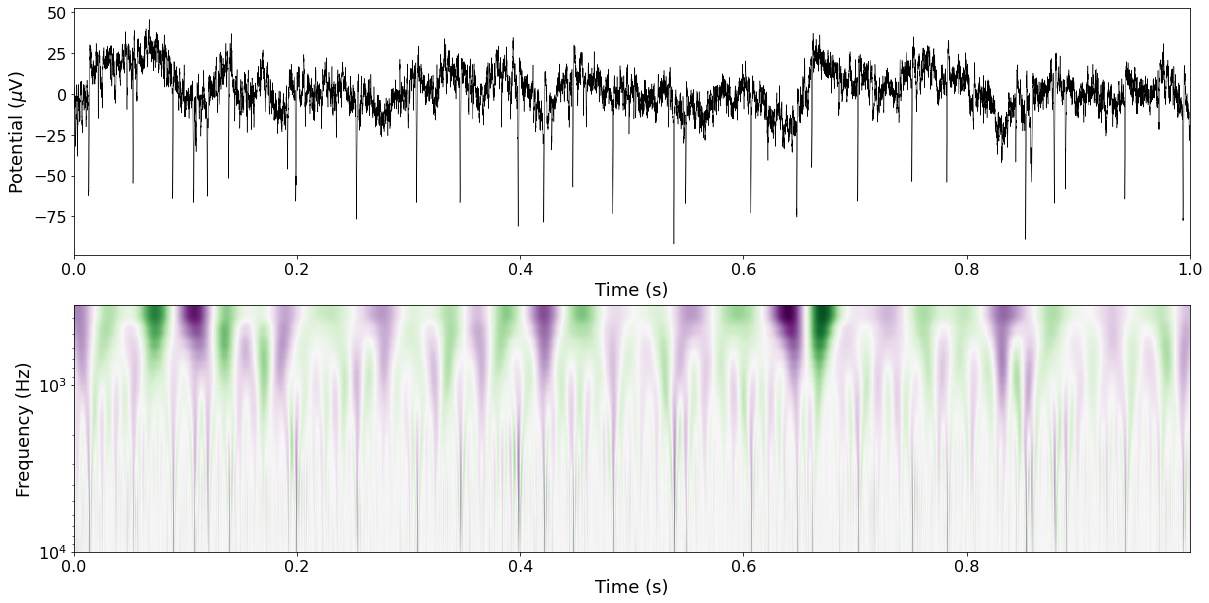

In [ ]:
# Plotting one second of the recording and the corresponding spectrogram


Nbins = 20000 # 20,000 time bins correspnd to 1 second of recording

fig,axs = plt.subplots(2,1,figsize=(20,10))


# Plotting the temporal trace
time = np.arange(Nbins)/sampling_frequency
axs[0].plot(time,electrode_activity[0:20000],'k',linewidth=0.5)
axs[0].set_xlim([0,1])
axs[0].set_xlabel('Time (s)', fontsize = 18)
axs[0].set_ylabel('Potential ($\mu$V)', fontsize = 18)
axs[0].tick_params(axis='both', labelsize = 16)


# computing the spectrogram 
widths =1/np.linspace(1/301,1/10,101)
cwtmatr = signal.cwt(electrode_activity[0:20000], signal.ricker, widths)
freqs = 5/widths*sampling_frequency

# plotting the spectrogram 
axs[1].imshow(cwtmatr[:,0:20000],extent=[0, time[-1], freqs[-1], freqs[0]], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
axs[1].set_yscale('log')
axs[1].set_ylabel('Frequency (Hz)', fontsize = 18)
axs[1].set_xlabel('Time (s)', fontsize = 18)
axs[1].tick_params(axis='both', labelsize = 16)



**Question 1**: As you can see, this temporal trace has low frequency fluctuations in addition to the spikes. These low frequency fluctuations correspond to the agglomerated activity of all surrouding cells. We would like to remove them using a high-pass filter. By inspecting the spectrogram, can you suggest a good cut-off frequency for the high-pass filter, such that low frequency fluctuations are removed but spikes are conserved? 

#YOUR ANSWER HERE
Good cut-off frequency for high-pass filter would be 2.5 kHz. We can see that below this 2.5 kHz there are fluctuations corresponding to the agglomerated activity of surrounding cells. Above the 2.5 kHz the spikes visible.

**Question 2**: Apply a high-pass filter to the temporal trace to remove the low-frequency fluctations. Plot the trace before and after application of the filter, in two separate plots. Add x and y labels and legends to your plots. Time should be in seconds.

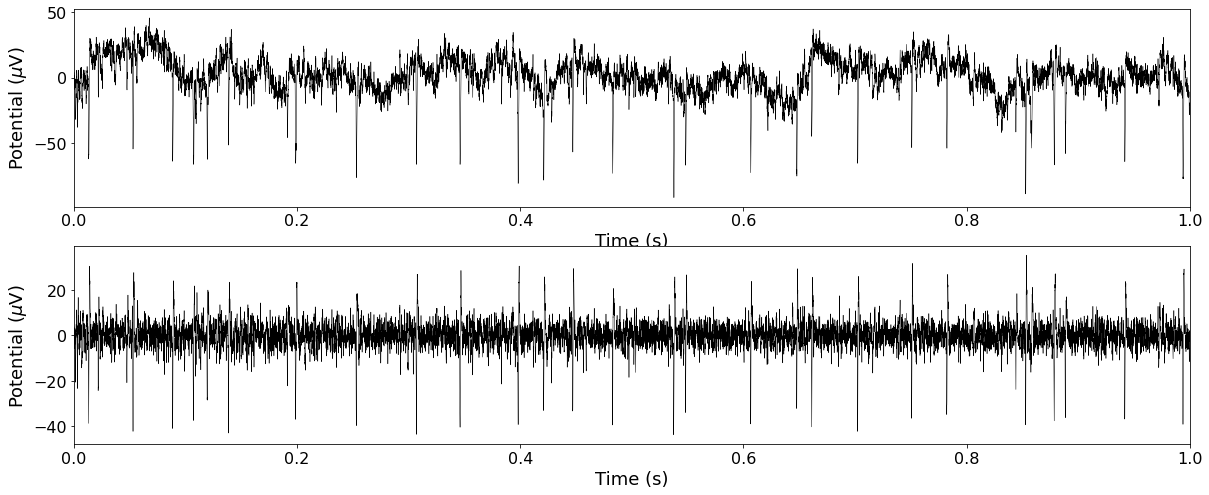

In [ ]:
from scipy.signal import lfilter

cutoff_freq = 2500
wc = cutoff_freq / sampling_frequency
electrode_activity_filtered = lfilter(np.array([1-wc, wc-1]),np.array([1, wc-1]),electrode_activity)

fig, axs = plt.subplots(2,1,figsize = (20,8))

# Plotting the unfiltered signal
time = np.arange(Nbins)/sampling_frequency
axs[0].plot(time,electrode_activity[0:20000],'k',linewidth=0.5)
axs[0].set_xlim([0,1])
axs[0].set_xlabel('Time (s)', fontsize = 18)
axs[0].set_ylabel('Potential ($\mu$V)', fontsize = 18)
axs[0].tick_params(axis='both', labelsize = 16)

# Plotting the filtered signal
time = np.arange(Nbins)/sampling_frequency
axs[1].plot(time,electrode_activity_filtered[0:20000],'k',linewidth=0.5)
axs[1].set_xlim([0,1])
axs[1].set_xlabel('Time (s)', fontsize = 18)
axs[1].set_ylabel('Potential ($\mu$V)', fontsize = 18)
axs[1].tick_params(axis='both', labelsize = 16)


In [ ]:
# FIND SOME HELP HERE
from scipy.signal import lfilter

cutoff =   # desired cutoff frequency of the filter, in Hz

# applying a high-pass filter at the specified cutoff frequency
wc = cutoff/sampling_frequency
electrode_activity_filtered = lfilter(np.array([1-wc, wc-1]),np.array([1, wc-1]),electrode_activity)

#subplots
fig, axs = plt.subplots(2,1,figsize = (20,8))



**Question 3**: Find the spike times using a threshold criterion: when the activity crosses a certain therehold, store the corresponding temporal index in an array. This array will contain all the spike times indices.

In [ ]:
thld = -20
spikes, = np.where((electrode_activity_filtered[1:]<thld)*(electrode_activity_filtered[0:-1]>thld))
spike_ind_arr = spikes # So we have 1871 time stamp indices, where activity crosses the threshold.
print(spike_ind_arr)
print(spike_ind_arr.shape)

[     29      62     263 ... 1196558 1197093 1199802]
(1871,)


In [ ]:
# FIND SOME HELP HERE

thld = -20; # spike detection threshold in microV
spks, = np.where((activity[1:]<thld)*(activity[0:-1]>thld))
spks

**Question 4**: Store all the spike waveforms into a matrix: for each spike, select a window of 50 time bins centered on the spike time, and store the corresponding waveform into the matrix. This matrix has size `number_of_spikes`x`50`. Plot all the waveforms on top of each other. Can you see by eye different shapes of waveforms which could correspond to different cells?

In [1]:
# I dont know how to begin with this..


#YOUR ANSWER HERE

**Question 5**: Applying PCA to vizualise the waveforms into a lower dimensional space:
- Compute the covariance matrix obtained from the waveform matrix. The covariance matrix should have size `50`x`50`. Plot this covraiance matrix using `imshow`.
- Apply PCA to this covariance matrix.
- Sort the eigenvalues in descending order and plot them. 
- Plot the eigenvectors corresponding to the two first eigenvalues. 
- Project the waveform data onto these two first eigenvectors, and plot the resulting projections in a 2D scatter plot (each point corresponds to one waveform, x-axis is PC1 and y-axis is PC2)
- By inspecting this scatter plot, do you find well-defined clusters? Does this suggest that this electrode is recording from more than one cell?

In [ ]:
# CODE YOUR SOLUTION HERE

#YOUR ANSWER HERE

**Question 6**: In order to isolate the different types of waveforms, we will cluster the waveforms using K-means:
- apply K-means clustering to the waveform matrix. Try K = 2 and K = 3. 
- For each K, replot the scatterplot of waveforms projected in principal component space, using a different color for each subset of points corresponding to a different cluster.
- For each K, replot all the waveforms on top of each other, using a different color for each subset of waveforms corresponding to a different cluster.
- By visually inspecting the results of K-means in PC space and waveform space, can you decide how many different cells this electrode is recording from. What is your level of certainty?



In [ ]:
# CODE YOUR SOLUTION HERE

In [ ]:
# FIND SOME HELP HERE

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
a = kmeans.fit(waveforms)
centroids = kmeans.cluster_centers_

labels = kmeans.labels_